In [1]:
import numpy as np
import pandas as pd
from random import shuffle
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms, datasets, models
from train import train_model, train_loss, train_accuracy, val_loss, val_accuracy
from torchsummary import summary
import time
import copy
import seaborn as sns

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

batch_size = 32


dataset = torch.load('64skulldataset.pt')
lengths = [
    int(len(dataset) * 0.8),
    int(len(dataset) * 0.1),
    int(len(dataset) * 0.1) + 1
]

trainset, valset, testset = random_split(dataset, lengths)
image_datasets = {'train': trainset, 'val': valset, 'test': testset}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4)
              for x in ['train', 'val', 'test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}  

In [2]:
class MultiCNN(nn.Module):
    def __init__(self):
        super(MultiCNN, self).__init__()
        self.fc1 = nn.Linear(6144, 256)
        self.fc2 = nn.Linear(256, 2)
        self.fc3 = nn.Linear(10, 2)
        resnet = models.resnet50(pretrained=True).to(device) 
        self.new_resnet1 = nn.Sequential(*list(resnet.children())[:-1])
        self.new_resnet2 = nn.Sequential(*list(resnet.children())[:-1])
        self.new_resnet3 = nn.Sequential(*list(resnet.children())[:-1])
        self.drop = nn.Dropout(p=0.5)
        
    def forward(self, x_slices):

        x1 = x_slices[0]
        x1 = self.new_resnet1(x1)
        x1 = x1.view(-1, 2048)

        x2 = x_slices[1]
        x2 = self.new_resnet2(x2)
        x2 = x2.view(-1, 2048)

        x3 = x_slices[2]
        x3 = self.new_resnet3(x3)
        x3 = x3.view(-1, 2048)

        out = torch.cat((x1, x2, x3), dim=-1)
        out = F.relu(self.drop(self.fc1(out)))
        out = F.relu(self.fc2(out))

        return out

Epoch 0/49
----------------------------------------------------------------------------------------------------



train Loss: 0.6527 Acc: 0.6409



val Loss: 0.7019 Acc: 0.6441
Epoch 1/49
----------------------------------------------------------------------------------------------------



train Loss: 0.4023 Acc: 0.8432



val Loss: 0.6537 Acc: 0.6864
Epoch 2/49
----------------------------------------------------------------------------------------------------



train Loss: 0.2100 Acc: 0.9248



val Loss: 0.6985 Acc: 0.7373
Epoch 3/49
----------------------------------------------------------------------------------------------------



train Loss: 0.1633 Acc: 0.9417



val Loss: 0.7937 Acc: 0.7288
Epoch 4/49
----------------------------------------------------------------------------------------------------



train Loss: 0.1636 Acc: 0.9280



val Loss: 0.6879 Acc: 0.7966
Epoch 5/49
----------------------------------------------------------------------------------------------------



train Loss: 0.1107 Acc: 0.9566



val Loss: 0.7764 Acc: 0.7797
Epoch 6/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0725 Acc: 0.9799



val Loss: 0.8076 Acc: 0.7458
Epoch 7/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0433 Acc: 0.9873



val Loss: 0.7314 Acc: 0.7458
Epoch 8/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0331 Acc: 0.9958



val Loss: 0.7978 Acc: 0.7881
Epoch 9/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0200 Acc: 0.9958



val Loss: 0.8049 Acc: 0.7966
Epoch 10/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0124 Acc: 1.0000



val Loss: 0.7455 Acc: 0.7797
Epoch 11/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0169 Acc: 0.9968



val Loss: 0.8559 Acc: 0.7966
Epoch 12/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0071 Acc: 1.0000



val Loss: 0.7885 Acc: 0.7797
Epoch 13/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0075 Acc: 1.0000



val Loss: 0.7335 Acc: 0.7797
Epoch 14/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0107 Acc: 0.9979



val Loss: 0.7757 Acc: 0.7881
Epoch 15/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0068 Acc: 0.9989



val Loss: 0.7731 Acc: 0.7881
Epoch 16/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0110 Acc: 0.9968



val Loss: 0.7905 Acc: 0.7797
Epoch 17/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0081 Acc: 0.9989



val Loss: 0.7362 Acc: 0.7797
Epoch 18/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0126 Acc: 0.9968



val Loss: 0.7687 Acc: 0.8051
Epoch 19/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0097 Acc: 1.0000



val Loss: 0.8291 Acc: 0.7881
Epoch 20/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0065 Acc: 0.9989



val Loss: 0.7476 Acc: 0.7881
Epoch 21/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0058 Acc: 0.9989



val Loss: 0.7257 Acc: 0.7966
Epoch 22/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0074 Acc: 1.0000



val Loss: 0.7597 Acc: 0.7881
Epoch 23/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0082 Acc: 0.9989



val Loss: 0.7470 Acc: 0.8051
Epoch 24/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0107 Acc: 0.9979



val Loss: 0.7480 Acc: 0.7881
Epoch 25/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0081 Acc: 0.9989



val Loss: 0.7533 Acc: 0.7712
Epoch 26/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0134 Acc: 0.9979



val Loss: 0.7527 Acc: 0.7881
Epoch 27/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0082 Acc: 1.0000



val Loss: 0.8105 Acc: 0.7797
Epoch 28/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0089 Acc: 1.0000



val Loss: 0.7712 Acc: 0.7797
Epoch 29/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0088 Acc: 0.9989



val Loss: 0.7992 Acc: 0.7797
Epoch 30/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0099 Acc: 0.9989



val Loss: 0.8116 Acc: 0.7712
Epoch 31/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0120 Acc: 0.9979



val Loss: 0.8439 Acc: 0.7627
Epoch 32/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0068 Acc: 1.0000



val Loss: 0.7659 Acc: 0.7881
Epoch 33/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0067 Acc: 0.9989



val Loss: 0.7675 Acc: 0.7797
Epoch 34/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0115 Acc: 0.9968



val Loss: 0.7952 Acc: 0.8051
Epoch 35/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0066 Acc: 1.0000



val Loss: 0.7887 Acc: 0.7966
Epoch 36/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0438 Acc: 0.9968



val Loss: 0.8740 Acc: 0.7712
Epoch 37/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0077 Acc: 0.9979



val Loss: 0.8470 Acc: 0.7627
Epoch 38/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0098 Acc: 0.9989



val Loss: 0.7396 Acc: 0.7881
Epoch 39/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0069 Acc: 1.0000



val Loss: 0.7836 Acc: 0.7797
Epoch 40/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0111 Acc: 0.9979



val Loss: 0.7578 Acc: 0.7797
Epoch 41/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0085 Acc: 0.9989



val Loss: 0.7890 Acc: 0.7712
Epoch 42/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0069 Acc: 1.0000



val Loss: 0.8506 Acc: 0.7627
Epoch 43/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0089 Acc: 0.9989



val Loss: 0.7660 Acc: 0.7966
Epoch 44/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0072 Acc: 1.0000



val Loss: 0.7725 Acc: 0.7881
Epoch 45/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0082 Acc: 0.9989



val Loss: 0.7895 Acc: 0.7881
Epoch 46/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0073 Acc: 0.9989



val Loss: 0.7738 Acc: 0.8051
Epoch 47/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0068 Acc: 1.0000



val Loss: 0.7594 Acc: 0.7797
Epoch 48/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0057 Acc: 1.0000



val Loss: 0.8147 Acc: 0.7881
Epoch 49/49
----------------------------------------------------------------------------------------------------



train Loss: 0.0080 Acc: 0.9989



val Loss: 0.7869 Acc: 0.7881
Training complete in 3m 18s
Best val Acc: 0.805085


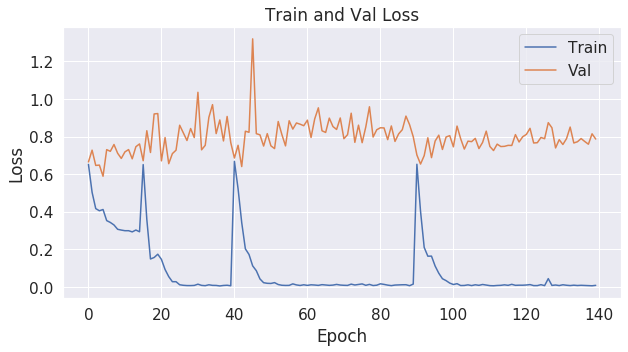

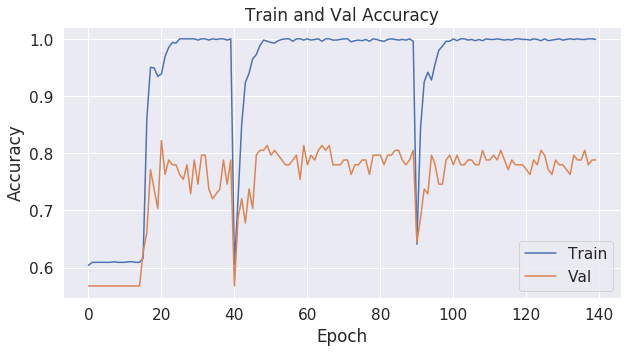

In [10]:
model = MultiCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
model = train_model(model, criterion, optimizer, exp_lr_scheduler, dataloaders, dataset_sizes,
                       num_epochs=50, batch_size = batch_size)

In [11]:
running_loss = 0.0
running_corrects = 0
for inputs, labels in tqdm(dataloaders['test'], total = dataset_sizes['test']//32+1):
    labels = labels.to(device)
    inputs = [i.to(device, dtype = torch.float) for i in inputs]

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)


    running_loss += loss.item() * 32
    running_corrects += torch.sum(preds == labels.data)
    
print(f"Test Loss: {running_loss / dataset_sizes['test']}\nTest Accuracy: {running_corrects.double() / dataset_sizes['test']}")



Test Loss: 0.5897671785675177
Test Accuracy: 0.8151260504201681


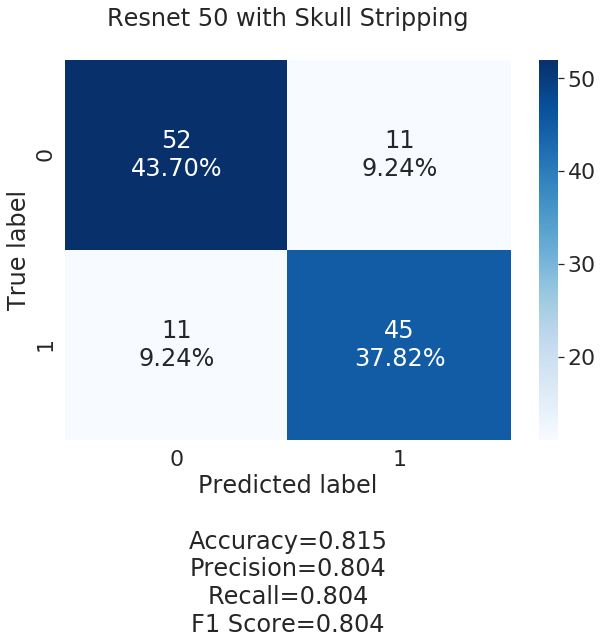

In [5]:
from confusionmatrix import make_confusion_matrix

sns.set(font_scale=2)

nb_classes = 2

cf = torch.zeros(nb_classes, nb_classes)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(dataloaders['test']):
        classes = classes.to(device)
        inputs = [i.to(device, dtype=torch.float) for i in inputs]
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        for t, p in zip(classes.view(-1), preds.view(-1)):
            cf[t.long(), p.long()] += 1

cf = np.array(cf)

group_names = ['bruh','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.reshape(-1)/cf.sum()]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

make_confusion_matrix(cf, group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize= (10,7),
                          cmap='Blues',
                          title='Resnet 50 with Skull Stripping\n')